## Import Basic Libraries 

In [77]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## Import Dataset 

In [2]:
df = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

## Glance of the dataset 

In [3]:
df.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
df.tail()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
2106,20.976842,Female,1.710730,131.408528,Sometimes,yes,3.0,3.0,no,no,1.728139,yes,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,21.982942,Female,1.748584,133.742943,Sometimes,yes,3.0,3.0,no,no,2.005130,yes,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,22.524036,Female,1.752206,133.689352,Sometimes,yes,3.0,3.0,no,no,2.054193,yes,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,24.361936,Female,1.739450,133.346641,Sometimes,yes,3.0,3.0,no,no,2.852339,yes,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III
2110,23.664709,Female,1.738836,133.472641,Sometimes,yes,3.0,3.0,no,no,2.863513,yes,1.026452,0.714137,Sometimes,Public_Transportation,Obesity_Type_III


## Columns and rows in the dataset 

In [5]:
df.shape

(2111, 17)

## Checking missing values 

In [6]:
df.isnull().sum()

Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                               0
SCC                               0
SMOKE                             0
CH2O                              0
family_history_with_overweight    0
FAF                               0
TUE                               0
CAEC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

## Checking the dublicates

In [7]:
df.duplicated().sum()

24

In [8]:
duplicate_counts = df.apply(lambda x: x.duplicated().sum())
print(duplicate_counts)


Age                                709
Gender                            2109
Height                             537
Weight                             586
CALC                              2107
FAVC                              2109
FCVC                              1301
NCP                               1476
SCC                               2109
SMOKE                             2109
CH2O                               843
family_history_with_overweight    2109
FAF                                921
TUE                                982
CAEC                              2107
MTRANS                            2106
NObeyesdad                        2104
dtype: int64


## Overview of the dataset 

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Gender                          2111 non-null   object 
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   CALC                            2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SCC                             2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  family_history_with_overweight  2111 non-null   object 
 12  FAF                             21

## Summary Statistics of the nummerical data 

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2111.0,24.312600,6.345968,14.00,19.947192,22.777890,26.000000,61.00
Height,2111.0,1.701677,0.093305,1.45,1.630000,1.700499,1.768464,1.98
Weight,2111.0,86.586058,26.191172,39.00,65.473343,83.000000,107.430682,173.00
FCVC,2111.0,2.419043,0.533927,1.00,2.000000,2.385502,3.000000,3.00
NCP,2111.0,2.685628,0.778039,1.00,2.658738,3.000000,3.000000,4.00
CH2O,2111.0,2.008011,0.612953,1.00,1.584812,2.000000,2.477420,3.00
FAF,2111.0,1.010298,0.850592,0.00,0.124505,1.000000,1.666678,3.00
TUE,2111.0,0.657866,0.608927,0.00,0.000000,0.625350,1.000000,2.00


## Summary statistics of the non-numerical dataset 

In [11]:
df.describe(include='object').T

,count,unique,top,freq
Gender,2111,2,Male,1068
CALC,2111,4,Sometimes,1401
FAVC,2111,2,yes,1866
SCC,2111,2,no,2015
SMOKE,2111,2,no,2067
family_history_with_overweight,2111,2,yes,1726
CAEC,2111,4,Sometimes,1765
MTRANS,2111,5,Public_Transportation,1580
NObeyesdad,2111,7,Obesity_Type_I,351


## Numerical columns

In [12]:
numerical_df = df.select_dtypes(include=[np.number])

In [13]:
numerical_df.columns

Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'], dtype='object')

## Object Columns

In [14]:
object_df = df.select_dtypes(include=[object])

In [15]:
object_df.columns

Index(['Gender', 'CALC', 'FAVC', 'SCC', 'SMOKE',
       'family_history_with_overweight', 'CAEC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

## Histogram for Height

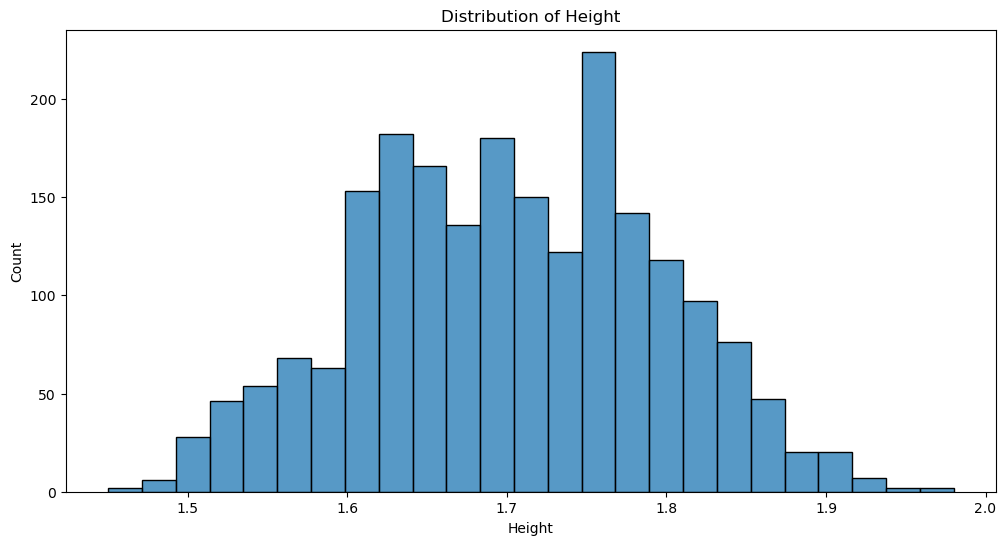

In [16]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Height'])
plt.title('Distribution of Height')
plt.show()

## Histogram for Weight

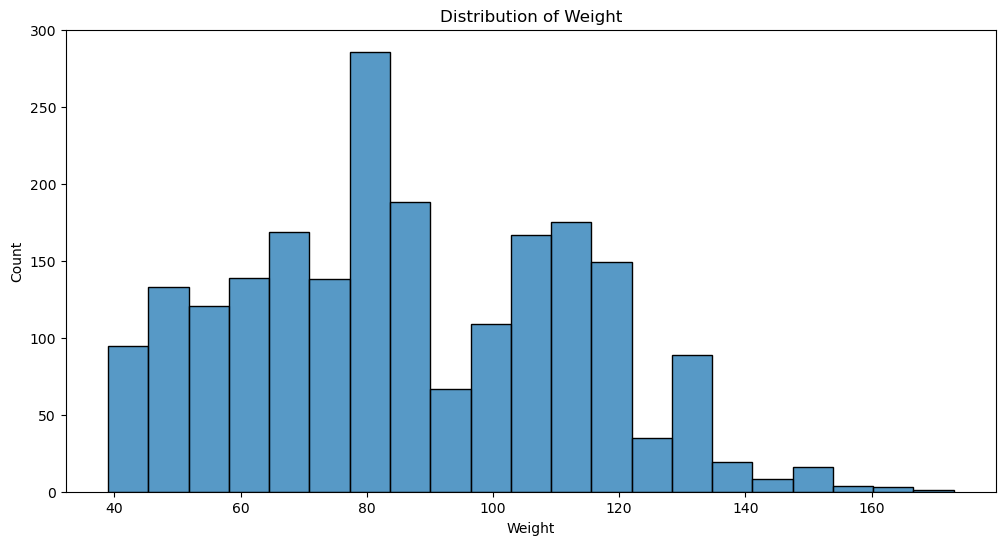

In [17]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Weight'])
plt.title('Distribution of Weight')
plt.show()

## Top 10 Ages with Highest Weight

In [18]:
df.columns

Index(['Age', 'Gender', 'Height', 'Weight', 'CALC', 'FAVC', 'FCVC', 'NCP',
       'SCC', 'SMOKE', 'CH2O', 'family_history_with_overweight', 'FAF', 'TUE',
       'CAEC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [19]:
top_ages = df.groupby('Age')['Weight'].mean().sort_values(ascending=False).head(10)


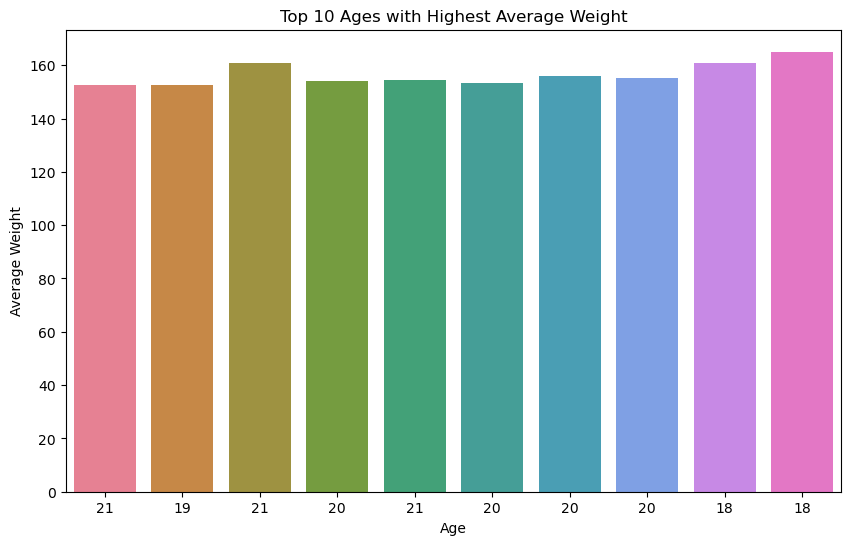

In [103]:
df['Age'] = df['Age'].astype(int)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_ages.index, y=top_ages.values, palette="husl")
plt.title('Top 10 Ages with Highest Average Weight')
plt.xlabel('Age')
plt.ylabel('Average Weight')

plt.gca().set_xticklabels([int(age) for age in top_ages.index])
plt.show()

## Distribution of CAEC values

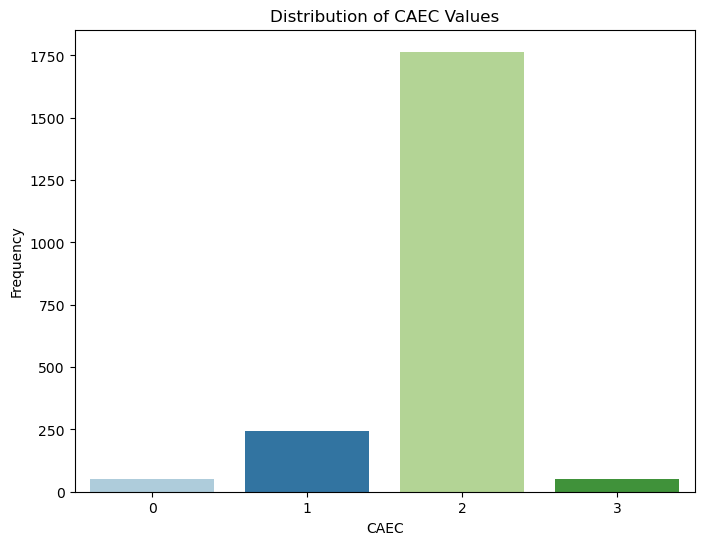

In [104]:
caec_counts = df['CAEC'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=caec_counts.index, y=caec_counts.values, palette="Paired")
plt.title('Distribution of CAEC Values')
plt.xlabel('CAEC')
plt.ylabel('Frequency')
plt.show()


 ## Average Ages with Family History with Overweight

In [22]:
df.columns

Index(['Age', 'Gender', 'Height', 'Weight', 'CALC', 'FAVC', 'FCVC', 'NCP',
       'SCC', 'SMOKE', 'CH2O', 'family_history_with_overweight', 'FAF', 'TUE',
       'CAEC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

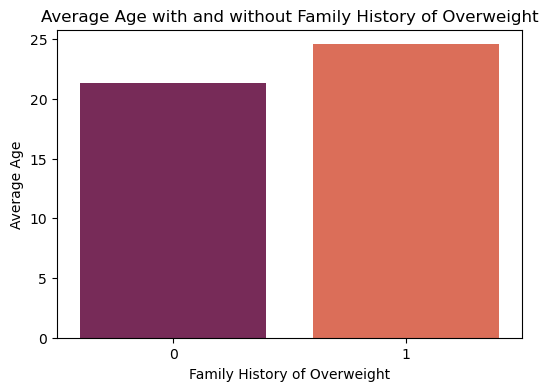

In [105]:
average_age = df.groupby( 'family_history_with_overweight')['Age'].mean()

plt.figure(figsize=(6, 4))
sns.barplot(x=average_age.index, y=average_age.values, palette="rocket")
plt.title('Average Age with and without Family History of Overweight')
plt.xlabel('Family History of Overweight')
plt.ylabel('Average Age')
plt.show()


## Correlation matrix

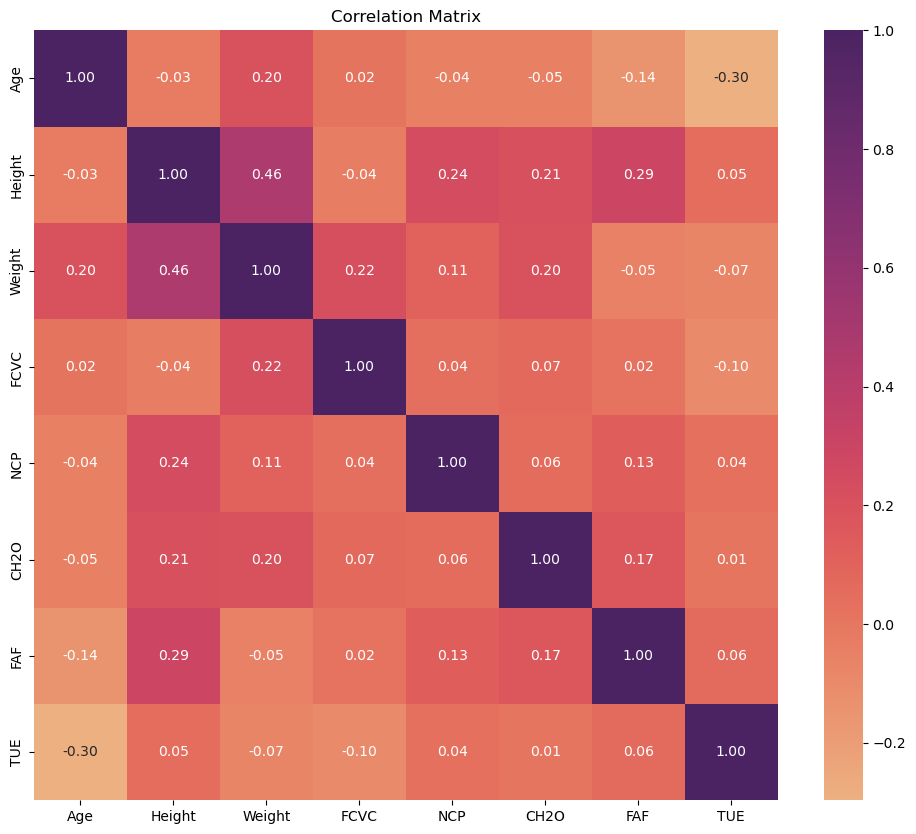

In [106]:
correlation_matrix = numerical_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="flare", fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


## Standard Scalar to Continuous Columns

In [25]:
numerical_df.columns

Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'], dtype='object')

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_numeric_df = scaler.fit_transform(numerical_df)
scaled_numeric_df = pd.DataFrame(scaled_numeric_df, columns=numerical_df.columns)

## Encoding for Categorical Column 

In [27]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
print(categorical_cols)

Index(['Gender', 'CALC', 'FAVC', 'SCC', 'SMOKE',
       'family_history_with_overweight', 'CAEC', 'MTRANS', 'NObeyesdad'],
      dtype='object')


In [33]:
nominal_data = ['CALC','CAEC', 'MTRANS']
print(nominal_data)

['CALC', 'CAEC', 'MTRANS']


In [34]:
ordinal_data = ['Gender','FAVC', 'SCC', 'SMOKE','family_history_with_overweight']
print(ordinal_data)

['Gender', 'FAVC', 'SCC', 'SMOKE', 'family_history_with_overweight']


## Label Encoding 

In [37]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in ordinal_data:
    df[col] = le.fit_transform(df[col])
df[['Gender', 'FAVC', 'SCC', 'SMOKE', 'family_history_with_overweight']]


,Gender,FAVC,SCC,SMOKE,family_history_with_overweight
0,0,0,0,0,1
1,0,0,1,1,1
2,1,0,0,0,1
3,1,0,0,0,0
4,1,0,0,0,0
...,...,...,...,...,...
2106,0,1,0,0,1
2107,0,1,0,0,1
2108,0,1,0,0,1
2109,0,1,0,0,1


## One Hot-encoding

In [78]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)


encoded_data = encoder.fit_transform(df[nominal_data ])

encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out())

result_df = pd.concat([df.drop(nominal_data, axis=1), encoded_df], axis=1)

print([result_df])



[      Age  Gender    Height      Weight  FAVC  FCVC  NCP  SCC  SMOKE  \
0      21       0  1.620000   64.000000     0   2.0  3.0    0      0   
1      21       0  1.520000   56.000000     0   3.0  3.0    1      1   
2      23       1  1.800000   77.000000     0   2.0  3.0    0      0   
3      27       1  1.800000   87.000000     0   3.0  3.0    0      0   
4      22       1  1.780000   89.800000     0   2.0  1.0    0      0   
...   ...     ...       ...         ...   ...   ...  ...  ...    ...   
2106   20       0  1.710730  131.408528     1   3.0  3.0    0      0   
2107   21       0  1.748584  133.742943     1   3.0  3.0    0      0   
2108   22       0  1.752206  133.689352     1   3.0  3.0    0      0   
2109   24       0  1.739450  133.346641     1   3.0  3.0    0      0   
2110   23       0  1.738836  133.472641     1   3.0  3.0    0      0   

          CH2O  ...  CALC_3  CAEC_0  CAEC_1 CAEC_2  CAEC_3  MTRANS_0  \
0     2.000000  ...     1.0     0.0     0.0    1.0     0.0    

## Train and Split ( Target Variable)

In [43]:
X = df.drop('NObeyesdad', axis=1)  
y = df['NObeyesdad']  

In [44]:
X.columns

Index(['Age', 'Gender', 'Height', 'Weight', 'CALC', 'FAVC', 'FCVC', 'NCP',
       'SCC', 'SMOKE', 'CH2O', 'family_history_with_overweight', 'FAF', 'TUE',
       'CAEC', 'MTRANS'],
      dtype='object')

## Logistic Regression

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [88]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6640378548895899
Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.76      0.87      0.81        86
      Normal_Weight       0.54      0.43      0.48        93
     Obesity_Type_I       0.60      0.47      0.53       102
    Obesity_Type_II       0.81      0.94      0.87        88
   Obesity_Type_III       0.93      1.00      0.97        98
 Overweight_Level_I       0.53      0.51      0.52        88
Overweight_Level_II       0.36      0.41      0.38        79

           accuracy                           0.66       634
          macro avg       0.65      0.66      0.65       634
       weighted avg       0.65      0.66      0.65       634



## Decision Tree

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9361702127659575
Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.90      0.98      0.94        56
      Normal_Weight       0.93      0.84      0.88        62
     Obesity_Type_I       0.96      0.91      0.93        78
    Obesity_Type_II       0.93      0.97      0.95        58
   Obesity_Type_III       1.00      1.00      1.00        63
 Overweight_Level_I       0.87      0.95      0.91        56
Overweight_Level_II       0.96      0.92      0.94        50

           accuracy                           0.94       423
          macro avg       0.94      0.94      0.94       423
       weighted avg       0.94      0.94      0.94       423



## Support Vector Machine 

In [56]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [81]:
svm = SVC(kernel='linear', random_state=42)

svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)


In [82]:

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8769716088328076

Confusion Matrix:
[[82  4  0  0  0  0  0]
 [17 60  0  0  0 11  5]
 [ 0  0 96  5  0  0  1]
 [ 0  0  0 88  0  0  0]
 [ 0  0  0  1 97  0  0]
 [ 0  6  0  0  0 72 10]
 [ 0  0  7  0  0 11 61]]

Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.83      0.95      0.89        86
      Normal_Weight       0.86      0.65      0.74        93
     Obesity_Type_I       0.93      0.94      0.94       102
    Obesity_Type_II       0.94      1.00      0.97        88
   Obesity_Type_III       1.00      0.99      0.99        98
 Overweight_Level_I       0.77      0.82      0.79        88
Overweight_Level_II       0.79      0.77      0.78        79

           accuracy                           0.88       634
          macro avg       0.87      0.87      0.87       634
       weighted avg       0.88      0.88      0.87       634



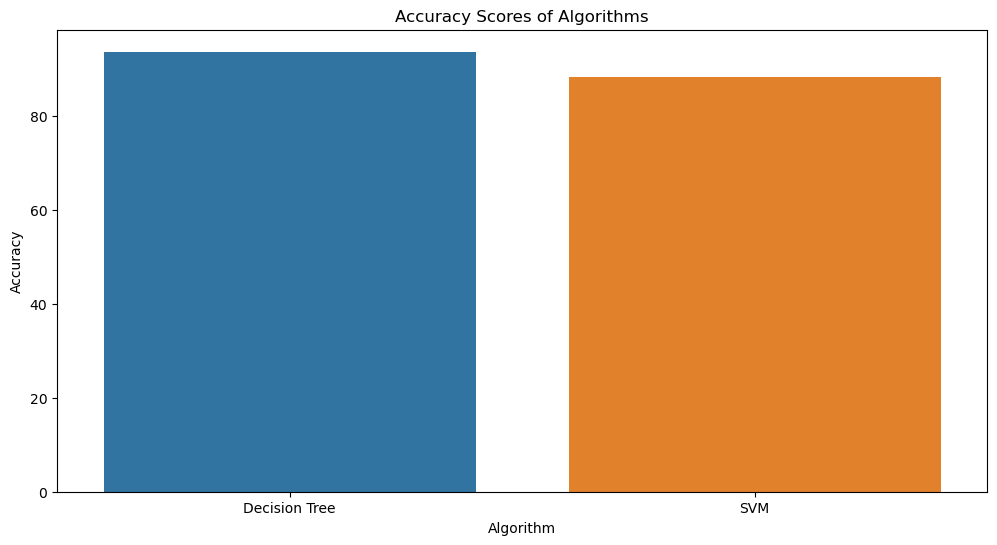

In [102]:
accuracy_scores = {
    'Decision Tree':  0.9361*100,
    'SVM': 0.8817*100
}
accuracy_df = pd.DataFrame(list(accuracy_scores.items()), columns=['Algorithm', 'Accuracy'])

# Plot accuracy scores
plt.figure(figsize=(12, 6))
sns.barplot(x='Algorithm', y='Accuracy', data=accuracy_df)
plt.title("Accuracy Scores of Algorithms")
plt.show()

## I found *Decision Tree* as best performer in this dataset. Becasue it accuracy score in  *0.9361*. There are changes of improvement in the model. This model might be underfit. We can get more better results via reqularization technique. 